
# 📘 Regresi Logistik — Prediksi Depresi Mahasiswa
**Dataset:** `cleaned_student_mental_health_depression.csv`  
**Tujuan:** Memprediksi status **Depression** (0 = tidak, 1 = ya) berdasarkan fitur demografis & akademik.

## Latar Belakang
Regresi **Logistik** digunakan untuk menghasilkan **kelas biner {0,1}**.  
Contoh modul: *berdasarkan jam belajar → apakah siswa lulus (1) atau tidak (0)*.  
Di sini: *berdasarkan Age, Gender, Year, CGPA, Course, Marital → apakah mahasiswa depresi atau tidak*.

## Asumsi Model (ringkas)
1. Target biner.  
2. Observasi independen.  
3. Hubungan fitur–log-odds (βX) linier.  
4. Tidak ada multikolinearitas ekstrem.


## 1) Import Library & Load Data

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

pd.set_option('display.max_columns', None)

df = pd.read_csv("cleaned_student_mental_health_depression.csv")
print("Shape:", df.shape)
df.head()


Shape: (101, 54)


,Gender,Age,Year,CGPA,Depression,Course_Accounting,Course_BCS,Course_BENL,Course_BIT,Course_Banking Studies,Course_Benl,Course_Biomedical science,Course_Biotechnology,Course_Business Administration,Course_CTS,Course_Communication,Course_DIPLOMA TESL,Course_Diploma Nursing,Course_ENM,Course_Econs,Course_Engine,Course_Engineering,Course_Fiqh,Course_Fiqh fatwa,Course_Human Resources,Course_Human Sciences,Course_IT,Course_Irkhs,Course_Islamic Education,Course_Islamic education,Course_KENMS,Course_KIRKHS,Course_KOE,Course_Kirkhs,Course_Koe,Course_Kop,Course_Law,Course_Laws,Course_MHSC,Course_Malcom,Course_Marine science,Course_Mathemathics,Course_Nursing,Course_Pendidikan Islam,Course_Pendidikan Islam,Course_Pendidikan islam,Course_Psychology,Course_Radiography,Course_TAASL,Course_Usuluddin,Course_engin,Course_koe,Course_psychology,Marital_Yes
0,0,18.0,1,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,21.0,2,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,19.0,1,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,22.0,3,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,23.0,4,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2) Eksplorasi Awal — Distribusi Target

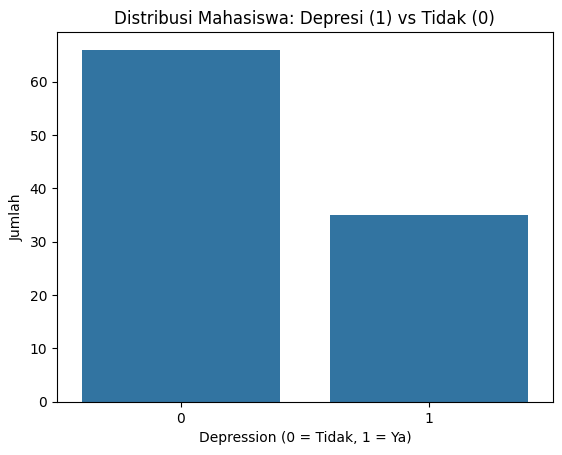

Ringkas statistik numerik:


,Gender,Age,Year,CGPA,Depression,Course_Accounting,Course_BCS,Course_BENL,Course_BIT,Course_Banking Studies,Course_Benl,Course_Biomedical science,Course_Biotechnology,Course_Business Administration,Course_CTS,Course_Communication,Course_DIPLOMA TESL,Course_Diploma Nursing,Course_ENM,Course_Econs,Course_Engine,Course_Engineering,Course_Fiqh,Course_Fiqh fatwa,Course_Human Resources,Course_Human Sciences,Course_IT,Course_Irkhs,Course_Islamic Education,Course_Islamic education,Course_KENMS,Course_KIRKHS,Course_KOE,Course_Kirkhs,Course_Koe,Course_Kop,Course_Law,Course_Laws,Course_MHSC,Course_Malcom,Course_Marine science,Course_Mathemathics,Course_Nursing,Course_Pendidikan Islam,Course_Pendidikan Islam,Course_Pendidikan islam,Course_Psychology,Course_Radiography,Course_TAASL,Course_Usuluddin,Course_engin,Course_koe,Course_psychology,Marital_Yes
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.257426,20.514851,1.970297,3.079208,0.346535,0.009901,0.178218,0.019802,0.099010,0.009901,0.009901,0.039604,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.019802,0.168317,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.039604,0.009901,0.009901,0.009901,0.009901,0.019802,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.019802,0.158416
std,0.439397,2.488429,0.994540,0.709692,0.478239,0.099504,0.384605,0.140014,0.300165,0.099504,0.099504,0.196000,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.140014,0.376013,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.196000,0.099504,0.099504,0.099504,0.099504,0.140014,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.140014,0.366952
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.000000,3.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [2]:

ax = sns.countplot(x='Depression', data=df)
ax.set_title("Distribusi Mahasiswa: Depresi (1) vs Tidak (0)")
ax.set_xlabel("Depression (0 = Tidak, 1 = Ya)")
ax.set_ylabel("Jumlah")
plt.show()

print("Ringkas statistik numerik:")
df.describe()


## 3) Bagi Data: Train/Test (80/20)

In [3]:

X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (80, 53) Test size: (21, 53)


## 4) Latih Model Regresi Logistik

In [4]:

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)
print("Model siap. Parameter utama:", {"C": model.C, "max_iter": model.max_iter, "solver": model.solver})


Model siap. Parameter utama: {'C': 1.0, 'max_iter': 1000, 'solver': 'lbfgs'}


## 5) Evaluasi: Akurasi, Confusion Matrix, Classification Report

In [5]:

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)

print(f"Akurasi: {acc:.3f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Akurasi: 0.857
Confusion Matrix:
[[14  0]
 [ 3  4]]

Classification Report:
              precision    recall  f1-score   support

           0      0.824     1.000     0.903        14
           1      1.000     0.571     0.727         7

    accuracy                          0.857        21
   macro avg      0.912     0.786     0.815        21
weighted avg      0.882     0.857     0.845        21



## 6) Visualisasi Confusion Matrix + Interpretasi Singkat

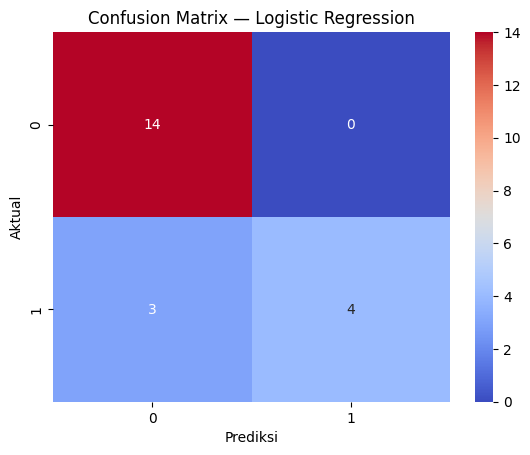

— Interpretasi —
Akurasi 85.71%: proporsi prediksi yang tepat di data uji.
Recall(1) 57.14%: seberapa banyak kasus depresi yang berhasil terdeteksi.
Precision(1) 100.00%: seberapa ‘benar’ prediksi depresi yang dihasilkan.
Catatan: Recall kelas 1 relatif rendah → model cenderung melewatkan sebagian kasus depresi. Jika tujuan utama adalah deteksi dini, pertimbangkan penyesuaian threshold/penyeimbangan data.


In [6]:

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Prediksi"); plt.ylabel("Aktual")
plt.show()

# Interpretasi ringkas otomatis
tn, fp, fn, tp = cm.ravel() if cm.size==4 else (np.nan, np.nan, np.nan, np.nan)
recall_pos = (tp / (tp + fn)) if (tp + fn) else np.nan
precision_pos = (tp / (tp + fp)) if (tp + fp) else np.nan

print("— Interpretasi —")
print(f"Akurasi {acc:.2%}: proporsi prediksi yang tepat di data uji.")
print(f"Recall(1) {recall_pos:.2%}: seberapa banyak kasus depresi yang berhasil terdeteksi.")
print(f"Precision(1) {precision_pos:.2%}: seberapa ‘benar’ prediksi depresi yang dihasilkan.")
if recall_pos < 0.70:
    print('Catatan: Recall kelas 1 relatif rendah → model cenderung melewatkan sebagian kasus depresi. '
          'Jika tujuan utama adalah deteksi dini, pertimbangkan penyesuaian threshold/penyeimbangan data.')


## 7) Pengaruh Fitur (Koefisien Logit β)

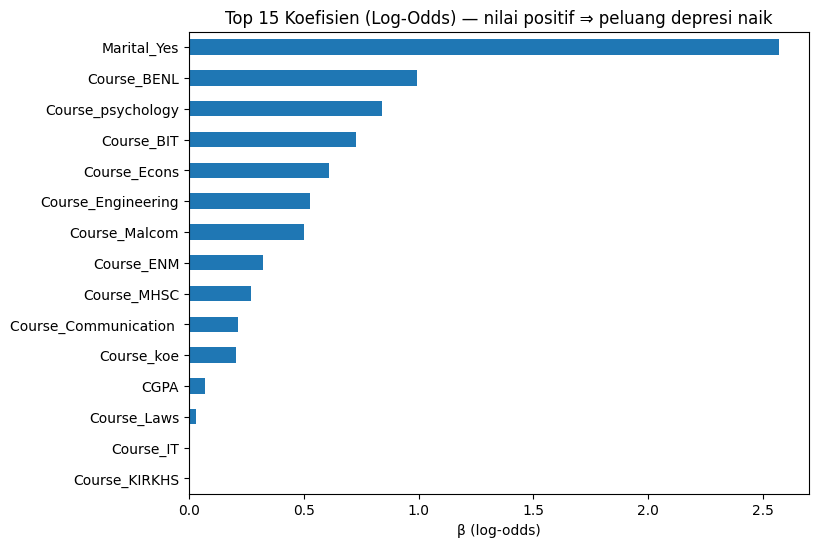

Catatan: Koefisien > 0 menaikkan peluang depresi; < 0 menurunkannya (ceteris paribus).


In [7]:

coef = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
ax = coef.head(15).plot(kind='barh', figsize=(8,6))
ax.set_title("Top 15 Koefisien (Log-Odds) — nilai positif ⇒ peluang depresi naik")
ax.set_xlabel("β (log-odds)")
plt.gca().invert_yaxis()
plt.show()

print("Catatan: Koefisien > 0 menaikkan peluang depresi; < 0 menurunkannya (ceteris paribus).")



## 8) Ringkasan untuk Pembaca
- **Tujuan:** memprediksi status depresi mahasiswa menggunakan regresi logistik (sesuai modul: output kelas {0,1}).  
- **Hasil Utama:** lihat *Akurasi*, *Confusion Matrix*, dan *Classification Report* pada bagian evaluasi.  
- **Interpretasi:** koefisien logit menunjukkan pengaruh fitur terhadap peluang depresi.  
- **Catatan Praktis:** jika fokus pada *deteksi dini*, perhatikan **Recall kelas 1**; bila rendah, pertimbangkan penyesuaian threshold atau balancing.
